# Fighting Earthquakes: Data analysis

This notebook includes all steps of the data pre-processing and analysis I performed for my article *Fighting ethquakes: Inhabitants of the north-easternmost Dutch province Groningen finally had enough, fought back against earthquake-causing gas extraction and won.*. Its aim is to make my workflow transparent and replicable.   
All data processing was performed with python, data sources are mentioned where the data is loaded, and all pre-processing and analysis steps are explained as they are carried out.   
The only thing that took part outside of this notebook was the creation of my final data visualisations, for which I used Flourish. More details on how I incorporated this tool into my workflow are mentioned at the appropriate parts in the notebook.
   
The raw data is available under the following link:
     
      
   
Table of contents:
- Step 1: loading and pre-processing the earthquake data
    - Step 1.1: loading and inspecting the earthquake data
    - Step 1.2: Pre-Processing the earthquake data
       - Step 1.2.1: Locations
       - Step 1.2.2: Years
       - Step 1.2.3: townships
    - Step 1.3: Visualisations and necessary pre-processing
       - Step 1.3.1: Overall earthquake frequency per year
       - Step 1.3.2: Overall earthquake frequency per year by township
       - Step 1.3.3: Share of earthquakes per township
       - Step 1.3.4: Frequency of 'strong' earthquakes
- Step 2: Adding data on overal gas production in the Netherlands
- Step 3: Adding data on housing prices
    - Step 3.1: Examining the development of housing prices in the region and comparing it to a reference area
    - Step 3.2: Breaking down the development of housing prices in the region by township and comparing it to a reference area
    
       
*Note: When you re-run the notebook, adapt the columns where I export data or turn them into markdown cells as the specified location where the xported data files are saved won't be found on your computer*

## Before we get started: loading the relevant python packages 

In [652]:
#loading relevant python packages for data processing, analysis, and visualisation
import pandas as pd
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: loading and pre-processing the earthquake data
   
### Step 1.1: loading and inspecting the earthquake data

In [653]:
#loading the KNMI earthquake data for the Netherlands and surrounding areas; source:   https://data.knmi.nl/datasets/aardbevingen_catalogus/1
data = xr.open_mfdataset(['earthquakes.nc'])
#transforming the data into a pandas dataframe for further processing
data = data.to_dataframe()

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
C:\Users\nicol\Anaconda3\lib\site-packages\xarray\backends\api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [654]:
#inspecting the initial data structure to determine which columns are relevant, and how the data needs to be transformed.
# To do so, I look at the tail of the data set
data.tail()

,iso_dataset,product,projection,id,time,lat,lon,depth,magnitude_type,magnitude,event_type,evaluation_mode,agency_id,location,link
earthquakes,,,,,,,,,,,,,,,
5431,b'',b'',b'',knmi1911rmeh,1911-09-06 13:54:47,50.70,6.32,15.0,MLnq,4.1,0,1,KNMI,Hürtgenwald (Duitsland),http://rdsa.knmi.nl/fdsnws/event/1/query?inclu...
5432,b'',b'',b'',knmi1911kuqv,1911-06-03 14:35:00,50.45,4.50,15.0,MLnq,4.2,0,1,KNMI,Fleurus (België),http://rdsa.knmi.nl/fdsnws/event/1/query?inclu...
5433,b'',b'',b'',knmi1911krqf,1911-06-01 22:52:00,50.45,4.50,10.0,MLnq,4.2,0,1,KNMI,Fleurus (België),http://rdsa.knmi.nl/fdsnws/event/1/query?inclu...
5434,b'',b'',b'',knmi1911kofs,1911-05-31 02:08:20,50.65,6.23,15.0,MLnq,4.0,0,1,KNMI,Roetgen (Duitsland),http://rdsa.knmi.nl/fdsnws/event/1/query?inclu...
5435,b'',b'',b'',knmi1911knta,1911-05-30 19:43:40,50.65,6.23,10.0,MLnq,4.2,0,1,KNMI,Roetgen (Duitsland),http://rdsa.knmi.nl/fdsnws/event/1/query?inclu...


Obviously, not all of this information is necessary (e.g. the link or the agency id, neither of which matter much for my purposes. On top of that, it seems like the dataset includes various locations that are not in the area I want to look at. In the following I will therefore pre-process the data by selecting relevant rows only and limiting the amount of columns.
   
### Step 1.2: Pre-processing the earthquake data

In [655]:
#selecting relevant columns only
data = data[['id', 'time', 'lat', 'lon', 'depth', 'magnitude', 'location']]

#### Step 1.2.1 Locations
In the following, I systematically remove all locations that do not lie inside or in close proximity to the Groningen gas field.

In [656]:
#taking a look at the locations first, as the dataset covers more than just the Grongen gas field, or even the Netherlands
data['location'].value_counts()

Bottrop (Duitsland)               317
Hamm (Duitsland)                  267
Dorsten (Duitsland)               236
Voerendaal                        142
Gelsenkirchen (Duitsland)         139
Rheinberg (Duitsland)             118
Bergkamen (Duitsland)             110
Dinslaken (Duitsland)             105
Marl (Duitsland)                   88
Sint Odiliënberg                   80
Kamen (Duitsland)                  79
Appingedam                         77
Moers (Duitsland)                  76
Alsdorf (Duitsland)                73
Garrelsweer                        67
Duisburg (Duitsland)               63
Kamp-Lintfort (Duitsland)          63
Eschweiler (Duitsland)             63
Overschild                         59
Lebach (Duitsland)                 58
Gladbeck (Duitsland)               57
Loppersum                          54
Werne (Duitsland)                  54
Zeerijp                            51
Bönen (Duitsland)                  49
Hünxe (Duitsland)                  48
Wirdum      

*Note: As can be seen from this output, the data includes various locations all over the Netherlands as well as in neighbouring countries (e.g. Germany, Belgioum, and France). This is no surprise, as, for example, the area around Maastricht is known to experience nminor naural earthquakes from time to time. However, it does necessitate limiting the dataset to relevant locations (-> locations in or close to the gas field) only.*

In [657]:
#calculating the number of data points as a reference point that allows me to check if my following transformations worked and how many datapoints they excluded
len(data)

5436

In [658]:
# selecting only Dutch eartquakes
# removing all locations that mention Germany in brackets in the location column
datanederland = data[~data['location'].str.contains("(Duitsland)")]
# doing the same for Belgium
datanederland = datanederland[~data['location'].str.contains("(België)")]
# and France
datanederland = datanederland[~data['location'].str.contains("(Frankrijk)")]
#checking the length of the datasets to see how many data points are left.
len(datanederland)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


2083

*The next step is filtering out the Dutch locations that are in or close to the Groningen gas field. Doing so takes quite some effort as I couldn't find a list of all villages in the gas field (the earhquake data is quite location-specific). I therefore relie on manual checking of whether or not a location is inside the gas field (with the help of google maps and a map of the area that the gas field covers). To make this feasible, I decided to leave out all locations that only saw one earthquake. That is arguably a limitation, however, I believe that those locations are a) not all that relevant anyway as they were hardly affected and b) are rather likely to not lie in the gas field as those areas saw quite a large number of earthquakes over the years.*   
Steps:   
- filter out locations that saw only one earthquake from the total Dutch dataset
- filter out locations that are in the Netherlands but not in the gas field


In [659]:
#creating a list of all locations to filter out locations that only saw one earthquake (for simplicity reasons and because those locations were arguably not affected very much)
#create a list with the number of earthquakes per location
all_locations = datanederland['location'].value_counts()
#turn the list into a dataframe for further processing
all_locations = pd.DataFrame(all_locations)
#reset the index
all_locations.reset_index(inplace = True)
#rename columns to keep things logical
all_locations = all_locations.rename(columns ={'index': 'location', 'location': 'earthquakes'})
#display the top of the dataframe
all_locations

,location,earthquakes
0,Voerendaal,142
1,Sint Odiliënberg,80
2,Appingedam,77
3,Garrelsweer,67
4,Overschild,59
5,Loppersum,54
6,Zeerijp,51
7,Wirdum,45
8,Sappemeer,43
9,Noordlaren,41


In [660]:
#create an array for the locations that saw more than just one earthquake (refer back to my earlier rationale for this)
gasveld_locations = all_locations.loc[all_locations['earthquakes'] > 1, 'location'].values
#turn the outcome array into a list
gasveld_locations = gasveld_locations.tolist()
#see if rows were really removed
len(all_locations)-len(gasveld_locations)

101

In [661]:
#see how many locations are in the final gas field data set
len(gasveld_locations)

153

*As can be seen from the output above, 101 locations were removed from the list of relevant locations. This leaves 153 unique locations in the Netherlands, that saw more than one earthquake since 1911. Now we need to remove rows that feature those locations from the actual dataset. To do so, I create a list of locations to remove and then check for each row in the actual datset if the location should be removed* 

In [662]:
#create a list of all locations that need to be removed from the final dataset
to_remove = [item for item in all_locations['location'] if item not in gasveld_locations]
len(to_remove)

101

In [663]:
#define the final dataset as the dataset that included all Dutch locations (filtering them comes later)
data_final = datanederland
#drop all rows that mention a location that saw only one earthquake
data_final = data_final[~data_final['location'].isin(to_remove)]
#calculate how many rows were dropped
len(datanederland) - len(data_final)

101

*As can be seen, 101 rows were dropped - exactly the amount of locations that were present only once and that I wanted to remove. The code worked! Next, it is time to exclude locations that are not in the gas field.*

In [664]:
#inspect the location list to manually check whether they lie in the gas field or not (as pointed out before, I do so with the help of google maps and a map of the gas field, judging whether or not a location is in it or not by a quick eye-test. Doing so might not be 100% percent error-proof but it should still be accurate enough, especially since locations outside the gas field are likely to not be affected much, meaning they won't have much of an impact on the overall earthquake mean scores)
gasveld_locations

['Voerendaal',
 'Sint Odiliënberg',
 'Appingedam',
 'Garrelsweer',
 'Overschild',
 'Loppersum',
 'Zeerijp',
 'Wirdum',
 'Sappemeer',
 'Noordlaren',
 'Roswinkel',
 'Tjuchem',
 'Siddeburen',
 'Froombosch',
 'Schildwolde',
 'Meedhuizen',
 'Harkstede',
 'Westeremden',
 'Lageland',
 'Hellum',
 'Scharmer',
 'Slochteren',
 'Ten Post',
 'Heerlen',
 'Groningen',
 'Farmsum',
 'Garsthuizen',
 'Stedum',
 "'t Zandt",
 'Wagenborgen',
 'Klimmen',
 'Zuidbroek',
 'Noordzee',
 'Oosterwijtwerd',
 'Wildervank',
 'Steendam',
 'Middelstum',
 'Kantens',
 'Noordbroek',
 'Emmen',
 'Zandeweer',
 'Garmerwolde',
 'Zuidlaren',
 'Uithuizermeeden',
 'Landgraaf',
 'Westerwijtwerd',
 'Maasbracht',
 'Eppenhuizen',
 'Uithuizen',
 'Woudbloem',
 'Kolham',
 'Delfzijl',
 'Ekehaar',
 'Bedum',
 'Veendam',
 'Herten',
 'Nieuw Annerveen',
 'Eexterveen',
 'Roermond',
 'Leermens',
 'Linne',
 'Geelbroek',
 'Posterholt',
 'Maria-Hoop',
 'Assen',
 'Hoogezand',
 'Zuidwolde',
 'Borgercompagnie',
 'Annen',
 'Krewerd',
 'Huizinge',
 'Usq

In [665]:
#remove the first two locations that don't lie in the gasveld to see if the code works (hence the name data_final_test)
data_final_test = data_final.loc[~((datanederland['location'] == 'Voerendaal') | (datanederland['location'] == 'Heerlen'))]
#check if it worked - although it's hard to tell if the number exactly matches the amount of rows it should have deleted
len(data_final)-len(data_final_test)

165

*If we go back to our earlier output, we see that the two locations did indeed see 165 earthquakes together (Heerlen: 23, Voerendaal: 142). This shows that the code works. Now it's time to apply it to the remaining locations that I found to not lie in the gas field.*

In [666]:
#remove the remaining locations that don't lie in the gasveld
data_final = data_final_test.loc[~((data_final_test['location'] == 'Sint Odiliënberg') | 
                                   (data_final_test['location'] == 'Klimmen') | 
                                   (data_final_test['location'] == 'Maasbracht') | 
                                   (data_final_test['location'] == 'Landgraaf') |
                                   (data_final_test['location'] == 'Herten') |
                                   (data_final_test['location'] == 'Roermond') | 
                                   (data_final_test['location'] == 'Linne') | 
                                   (data_final_test['location'] == 'Maria-Hoop') |
                                   (data_final_test['location'] == 'Posterholt') |
                                   (data_final_test['location'] == 'Hoensbroek') |
                                   (data_final_test['location'] == 'Valkenburg') |
                                   (data_final_test['location'] == 'Montford') |
                                   (data_final_test['location'] == 'Heel') |
                                   (data_final_test['location'] == 'Bergen') |
                                   (data_final_test['location'] == 'Noordzee (nabij Egmond aan Zee)') |
                                   (data_final_test['location'] == 'Hulsberg') |
                                   (data_final_test['location'] == 'Nijmegen') |
                                   (data_final_test['location'] == 'Wessem') |
                                   (data_final_test['location'] == 'Echt') |
                                   (data_final_test['location'] == 'Koningsbosch') |
                                   (data_final_test['location'] == 'Geleen') |
                                   (data_final_test['location'] == 'Weert') |
                                   (data_final_test['location'] == 'Maastricht') |
                                   (data_final_test['location'] == 'Kerkrade') |
                                   (data_final_test['location'] == 'Elkenrade') |
                                   (data_final_test['location'] == 'Margraten') |
                                   (data_final_test['location'] == 'Anna Paulowna') |
                                   (data_final_test['location'] == 'Wittem') |
                                   (data_final_test['location'] == 'Noordzee (nabij Schoorl)') |
                                   (data_final_test['location'] == 'Schin op Geul') |
                                   (data_final_test['location'] == 'Noordzee (nabij Castricum)') |
                                   (data_final_test['location'] == 'Wijnandsrade') |
                                   (data_final_test['location'] == 'Susteren') |
                                   (data_final_test['location'] == 'Montfort') |
                                   (data_final_test['location'] == 'Jabeek'))]
len(data_final_test)-len(data_final)

244

In [667]:
#checking how many rows are left in the final data set
len(data_final)

1573

In [668]:
#checking how many unique locatioons are included in the final data set
len(data_final['location'].value_counts())

117

*Alltogether, 244 data points were removed from the original dataset (in addition to the 165 I removed earlier). This leaves me a final data set that includes 1573 data points with 117 unique locations.*   
*Now it's time to limit the dataset further by excluding the years before the gas field was even discovered.*   

#### Step 1.2.2: Years

In [669]:
#create a year column by turning the time column values into datetime format and extracting the only the year to fill an additional column
data_final['year'] = pd.DatetimeIndex(data_final['time']).year
#check when the earthquakes started
data_final.tail()

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,time,lat,lon,depth,magnitude,location,year
earthquakes,,,,,,,,
5001,knmi1991dejz,1991-02-15 02:11:16.539999744,52.77100,6.914000,3.0,2.2,Emmen,1991
5102,knmi1988hkrg,1988-04-15 10:49:35.070000128,54.11083,6.331666,10.0,3.7,Noordzee,1988
5114,knmi1987ylou,1987-12-14 20:49:48.000000000,52.92830,6.551700,1.5,2.5,Hooghalen,1987
5139,knmi1986zgna,1986-12-26 07:47:51.000000000,52.99170,6.548300,1.0,2.8,Assen,1986
5146,knmi1986rnqx,1986-09-07 09:24:49.010000384,53.91767,3.131667,27.9,3.2,Noordzee,1986


#### Step 1.2.3: Adding townships
Annoyingly, I didn't find a more elegant way so after several attempts of basing the code on lists, I just moved on to write the code the way I did. I simply googled the townships on Wikipedia and entered the 'population centers' mentioned there into the code.

In [670]:
#determining the areas that are most affected for later analyses of housing price developments. I looked up the townships of each location to arrive at a list of the ten most affected townships.
data_final['location'].value_counts().head(40)

Appingedam         77
Garrelsweer        67
Overschild         59
Loppersum          54
Zeerijp            51
Wirdum             45
Sappemeer          43
Noordlaren         41
Roswinkel          40
Siddeburen         38
Tjuchem            38
Schildwolde        37
Froombosch         37
Meedhuizen         35
Westeremden        34
Harkstede          34
Lageland           32
Scharmer           26
Hellum             26
Slochteren         26
Ten Post           25
Groningen          23
Farmsum            21
Garsthuizen        20
't Zandt           19
Stedum             19
Wagenborgen        18
Zuidbroek          18
Noordzee           17
Oosterwijtwerd     17
Wildervank         17
Steendam           17
Middelstum         16
Emmen              15
Kantens            15
Noordbroek         15
Garmerwolde        14
Zandeweer          14
Zuidlaren          13
Uithuizermeeden    13
Name: location, dtype: int64

The locations that are most affected and where there is also housing data from CBS organised by township are:
- Appingedam
- Loppersum (Garrelsweer, Zeerijp, Westeremden, Middelstum        )
- Midden-Groningen (Overshild, Froombosch, Schildwolde, Lageland) -> excluded as there's no CBS data
- Haren (Noordlaren)
- Slochteren (Siddeburen, Tjuchem, Harkstede, Hellum)
- Emmen (Roswinkel)
- Delfzijl (Meedhuizen)
- Groningen (Groningen, Ten Post)
- Veendam (Wildervank)
- Menterwolde (Noordbroek)
- Het Hogeland (Kantens) -> excluded as there's no CBS data
- Tynarloo (Zuidlaren)

In [671]:
#create a function that determines the township a location belongs to
def add_township(row): 
    if row['location']== 'Appingedam' or row['location']== 'Garreweer' or row['location']== 'Jukwerd' or row['location']== 'Laskwerd' or row['location']== 'Marsum' or row['location']== 'Oling' or row['location']== 'Opwierde' or row['location']== 'Solwerd' or row['location']== 'Tjamsweer':
        return 'Appingedam'
    elif row['location']== 'Delfzijl' or row['location']== 'Bierum' or row['location']== 'Biessum' or row['location']== 'Borgsweer' or row['location']== 'Biessum' or row['location']== 'Farmsum' or row['location']== 'Godlinze' or row['location']== 'Holwierde' or row['location']== 'Krewerd' or row['location']== 'Losdorp' or row['location']== 'Meedhuizen' or row['location']== 'Spijk' or row['location']== 'Termunten' or row['location']== 'Termunterzijl' or row['location']== 'Uitwierde' or row['location']== 'Wagenborgen' or row['location']== 'Weiwerd' or row['location']== 'Woldendorp':
        return 'Delfzijl'
    elif row['location']== 'Barger-Compascuum' or row['location']== 'Emmen' or row['location']== 'Emmer-Compascuum' or row['location']== 'Erica' or row['location']== 'Klazienaveen' or row['location']== 'Nieuw-Amsterdam/Veenoord' or row['location']== 'Nieuw-Dordrecht' or row['location']== 'Nieuw-Schoonebeek' or row['location']== 'Nieuw-Weerdinge' or row['location']== 'Roswinkel' or row['location']== 'Schoonebeek' or row['location']== 'Weiteveen' or row['location']== 'Zwartemeer':
        return 'Emmen'
    elif row['location']=='Dorkwerd' or row['location']=='Engelbert' or row['location']=='Garmerwolde' or row['location']=='Glimmen' or row['location']=='Groningen' or row['location']=='Hoogkerk' or row['location']=='Leegkerk' or row['location']=='Lellens' or row['location']=='Meerstad' or row['location']=='Middelbert' or row['location']=='Noorddijk' or row['location']=='Onnen' or row['location']=='Sint-Annen' or row['location']=='Ten Boer' or row['location']=='Ten Post' or row['location']=='Thesinge' or row['location']=='Winneweer' or row['location']=='Wittewierum' or row['location']=='Woltersum':
        return 'Groningen'
    elif row['location']== 'Haren' or row['location']== 'Essen' or row['location']=='Noordlaren':
        return 'Haren'
    elif row['location']== 'Garrelsweer' or row['location']== 'Garsthuizen' or row['location']== 'Huizinge' or row['location']=='Loppersum' or row['location']== 'Middelstum' or row['location']=='Oosterwijtwerd' or row['location']== 'Stedum' or row['location']== "'t Zandt" or row['location']=='Westeremden' or row['location']== 'Westerwijtwerd' or row['location']== 'Wirdum' or row['location']== 'Zeerijp':
        return 'Loppersum'
    elif row['location']== 'Borgercompagnie' or row['location']== 'Meeden' or row['location']== 'Muntendam' or row['location']== 'Nordbroek' or row['location']== 'Tripscompagnie' or row['location']=='Zuidbroek':
        return 'Menterwolde'
    elif row['location']== 'Harkstede' or row['location']== 'Hellum' or row['location']== 'Lageland' or row['location']== 'Overschild' or row['location']== 'Slochteren' or row['location']== 'Siddeburen' or row['location']== 'Tjuchem':
        return 'Slochteren'
    elif row['location']== 'Zuidlaren' or row['location']== 'Paterswolde' or row['location']== 'Tynaarlo' or row['location']=='Eelde' or  row['location']=='Midlaren' or row['location']=='Donderen':
        return 'Tynaarlo'
    elif row['location']== 'Wildervank' or row['location']== 'Veendam':
        return 'Veendam'
    else:
        return 'unknown township'

#applying the function to the data set
data_final['township'] = data_final.apply (lambda row: add_township(row), axis=1)
#inspecting the dataset to see if it worked
data_final

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,time,lat,lon,depth,magnitude,location,year,township
earthquakes,,,,,,,,,
1,knmi2019vdlv,2019-10-28 17:38:33.000000000,53.31500,6.748000,3.0,1.240827,Garrelsweer,2019,Loppersum
3,knmi2019urfh,2019-10-22 00:42:05.900000256,53.31600,6.863000,3.0,0.798264,Appingedam,2019,Appingedam
4,knmi2019unub,2019-10-20 03:36:42.399998976,53.23600,6.650000,3.0,0.928732,Harkstede,2019,Slochteren
5,knmi2019ujxb,2019-10-18 00:35:54.799999488,53.31600,6.863000,3.0,0.522347,Appingedam,2019,Appingedam
6,knmi2019tszd,2019-10-08 18:19:31.600000000,53.26100,6.781000,3.0,0.428906,Overschild,2019,Slochteren
7,knmi2019tplz,2019-10-06 20:17:00.200000000,53.29900,6.910000,3.0,1.551974,Meedhuizen,2019,Delfzijl
8,knmi2019toay,2019-10-06 01:33:26.399998976,53.31500,6.733000,3.0,1.019390,Loppersum,2019,Loppersum
9,knmi2019smli,2019-09-20 22:59:30.600000000,53.14900,6.887000,3.0,0.387637,Muntendam,2019,Menterwolde
11,knmi2019rreq,2019-09-09 07:45:22.600000000,53.34300,6.754000,3.0,1.528143,Zeerijp,2019,Loppersum


In [672]:
#cross checking again if all townships are indeed included
data_final['township'].value_counts()

unknown township    507
Loppersum           361
Slochteren          253
Delfzijl            112
Groningen            83
Appingedam           77
Emmen                57
Haren                46
Menterwolde          35
Veendam              27
Tynaarlo             15
Name: township, dtype: int64

### Step 1.3: Visualisations and necessary pre-processing
   
#### Step 1.3.1: Overall earthquake frequency per year

In [673]:
#create data for over time visualisation of earthquake frequency; first select only the year and the id as a unique proxy for earthquakes
td_eqs = data_final[["year", "id"]]
#then rename the columns ()
td_eqs = td_eqs.rename(columns={"id": "number of earthquakes"})
#then group by year and count the amount of unique id's (already relabelled before)
td_eqs= td_eqs.groupby('year').count()
#see if it worked
td_eqs.head()

,number of earthquakes
year,
1986,2
1987,1
1988,1
1991,4
1992,6


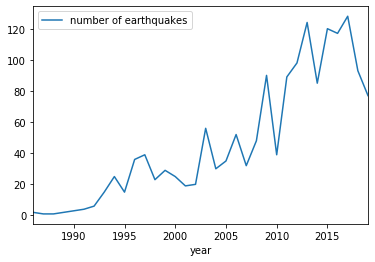

In [674]:
#plot the development of earthquake frequency over time
td_eqs.plot()

In [675]:
#inspect the data to see how earthquake freuquency developped over time in absolute numbers
td_eqs

,number of earthquakes
year,
1986,2
1987,1
1988,1
1991,4
1992,6
1993,15
1994,25
1995,15
1996,36


#### Step 1.3.2: Overall earthquake frequency per year by township

In [676]:
#create a second dataset where the frequency of earthquakes is aggregated by townships
#create a column 'earthquakes' in the final dataset that has the value one for every earthquake
data_final['earthquakes'] = 1
#Group the data by township and year, summing up the number of earthquakes per township per year
data_final_agg = data_final.groupby(['township', 'year'])['earthquakes'].aggregate('sum').unstack()
#fill empty values with zeros
data_final_agg = data_final_agg.fillna(0)
#inspect the data
data_final_agg

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


year,1986,1987,1988,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
township,,,,,,,,,,,,,,,,,,,,,
Appingedam,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,2.0,2.0,5.0,9.0,5.0,8.0,3.0,11.0,6.0,7.0
Delfzijl,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,...,4.0,5.0,5.0,9.0,6.0,12.0,14.0,16.0,2.0,6.0
Emmen,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0
Groningen,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,7.0,5.0,8.0,6.0,7.0,11.0,5.0,4.0,7.0
Haren,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Loppersum,0.0,0.0,0.0,1.0,1.0,6.0,4.0,4.0,3.0,4.0,...,4.0,20.0,28.0,31.0,17.0,23.0,20.0,35.0,26.0,25.0
Menterwolde,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,1.0,4.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,4.0
Slochteren,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,2.0,8.0,...,10.0,17.0,22.0,25.0,19.0,18.0,22.0,15.0,20.0,12.0
Tynaarlo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [677]:
#transpose the data to get it into a format by which I can visualise it with Flourish
data_final_agg2 = data_final_agg.transpose()
#remove the first three years to get a continuous set of years
data_final_agg2 = data_final_agg2.iloc[3:] 
#inspect the data
data_final_agg2

township,Appingedam,Delfzijl,Emmen,Groningen,Haren,Loppersum,Menterwolde,Slochteren,Tynaarlo,Veendam,unknown township
year,,,,,,,,,,,
1991,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1992,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
1993,1.0,0.0,0.0,1.0,0.0,6.0,0.0,4.0,0.0,0.0,3.0
1994,2.0,2.0,2.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0,11.0
1995,0.0,3.0,2.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,4.0
1996,1.0,3.0,9.0,1.0,0.0,3.0,0.0,2.0,0.0,3.0,14.0
1997,0.0,2.0,9.0,0.0,0.0,4.0,2.0,8.0,3.0,0.0,11.0
1998,0.0,1.0,4.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,11.0
1999,1.0,1.0,7.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,14.0


In [678]:
#add a year clumn for visualisation with Flourish, as Flourish does not recognise indexes
data_final_agg2['year'] = range(1991, 2020)

In [679]:
#export the data as a csv that I ca then upload to Flourish
export_csv = data_final_agg2.to_csv (r'C:\Users\nicol\Desktop\export_dataframe_eqs_agg.csv', index = None, header=True)

##### *Note on Visualisation*
Flourish is an online tool that allows one to design custom-designed data visualisations without in a fairly easy manner. In this case I used it to create a stacked area chart that allows the reader to deduce both the overall frequency of earthquakes and the proportions per townships. Doing that in python would have been considerably harder, which I why I chose to use Flourish instead.   
To create the visualisation, I simply uploaded the exported csv file, chose the proper chart type, specified the year column as the x values and the remaining columns as unique y values. I then added a title, a source, and x- and y-axis labels.

#### Step 1.3.3: Share of earthquakes per township

In [738]:
#calculate the overall amount of earthquakes per region
eqs_per_township = data_final_agg2.sum(axis=0)
#turn the resulting series object into a dataframe
eqs_per_township = eqs_per_township.to_frame()
#reset the index in such a way that the twnships become their own column
eqs_per_township.reset_index(level=0, inplace=True)
#rename column
eqs_per_township = eqs_per_township.rename(columns={0: "Number of earthquakes"})
#inspect data
eqs_per_township

,township,Number of earthquakes
0,Appingedam,77.0
1,Delfzijl,112.0
2,Emmen,57.0
3,Groningen,83.0
4,Haren,46.0
5,Loppersum,361.0
6,Menterwolde,35.0
7,Slochteren,253.0
8,Tynaarlo,15.0
9,Veendam,27.0


In [739]:
#remove the last row of the df as it makes no sense (sum of the numeric values of all the years)
eqs_per_township = eqs_per_township[:-1]
#ispect data
eqs_per_township

,township,Number of earthquakes
0,Appingedam,77.0
1,Delfzijl,112.0
2,Emmen,57.0
3,Groningen,83.0
4,Haren,46.0
5,Loppersum,361.0
6,Menterwolde,35.0
7,Slochteren,253.0
8,Tynaarlo,15.0
9,Veendam,27.0


In [735]:
#export the data as a csv that I ca then upload to Flourish
export_csv = eqs_per_township.to_csv (r'C:\Users\nicol\Desktop\export_dataframe_eqs_per_township.csv', index = None, header=True)

##### *Note on Visualisation*
Flourish is an online tool that allows one to design custom-designed data visualisations without in a fairly easy manner. In this case I used it to create a pie chart that displays the overall share of earthquakes per township. Doing so helps to put the township-level houseing price development data into perspective. I could of course just used python for this comparably simple chart, but I wanted to stay consistent in my graphic layout. 

#### Step 1.3.4: Frequency of 'strong' earthquakes

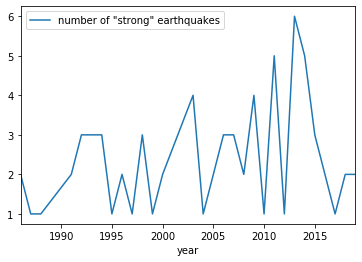

In [680]:
#Create dataset for over time visualisation of earthquake strength (counting only earthquakes with a magnitude of 2.5 or higher, because they are "Often felt, but only causes minor damage."). Same process as earlier.
#select only rows with earthquakes that had a magnitude of 2.5 or higher
eqs_strong = data_final.query('magnitude>= 2.5')
td_eqs_strong = eqs_strong[["year", "id"]]
td_eqs_strong = td_eqs_strong.rename(columns={"id": 'number of "strong" earthquakes'})
td_eqs_strong= td_eqs_strong.groupby('year').count()
td_eqs_strong.plot()

In [681]:
# add a unique year column to draw on when using Flourish to visualise the data
td_eqs_strong_vis = td_eqs_strong.iloc[3:]
td_eqs_strong_vis['year'] = 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019
#check if it worked
td_eqs_strong_vis.head()

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,"number of ""strong"" earthquakes",year
year,,
1991,2,1991
1992,3,1992
1994,3,1994
1995,1,1995
1996,2,1996


In [682]:
#export the datafile to visualise in Florish
export_csv = td_eqs_strong_vis.to_csv (r'C:\Users\nicol\Desktop\export_dataframe_td_eqs_strong.csv', index = None, header=True)

##### *Note on Visualisation*
Flourish is an online tool that allows one to design custom-designed data visualisations without in a fairly easy manner. In this case I used it to create a line chart that maps the development of strong earthquake frequency over time. I also added annotations within the graph for reference reasons which is the main reason why I used Flourish in this case.

### Step 2: Adding data on overal gas production in the Netherlands

In [683]:
#loading data on overall gas supply in m3 in the Netherlands; source: https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83140ENG&_theme=979
supply = pd.read_csv('gas_supply.csv', sep=';')
#inspect the data
supply.head()

,ID,Periods,TotalSupply_1,IndigenousProduction_2,ProductionFromOtherSources_3,ImportsOfGaseousNaturalGas_4,ImportsOfLiquefiedNaturalGasLng_5,ExportsOfGaseousNaturalGas_6,ExportsOfLiquefiedNaturalGasLng_7,StockChange_8
0,0,1946JJ00,0,0,.,NaN,NaN,NaN,NaN,NaN
1,1,1947JJ00,1,1,.,NaN,NaN,NaN,NaN,NaN
2,2,1948JJ00,5,5,.,NaN,NaN,NaN,NaN,NaN
3,3,1949JJ00,7,7,.,NaN,NaN,NaN,NaN,NaN
4,4,1950JJ00,5,5,.,NaN,NaN,NaN,NaN,NaN


In [684]:
#turning NaNs into zeros for future processing
supply = supply.fillna(0)
#renaming columns
supply = supply.rename(columns={'Periods':'year', 'TotalSupply_1':'gas_used_in_the_Netherlands', 'IndigenousProduction_2':'indigenous_production'})
#change the datatype of the year column
supply['year'] = supply['year'].astype(str)
#remove unwanted parts of the year data (namely the JJ00 addition that has no value for my future analysis)
supply['year'] = [x[:-4] for x in supply['year']]
#changing the datatype of years back to integer
supply['year'] = supply['year'].astype(int)
#select only the relevant years (from the discovery of the groningen gas field onwards)
supply = supply.query('year >= 1959')
#adding exports and imports together in a new column
supply['natural_gas_imports'] = supply['ImportsOfGaseousNaturalGas_4'] + supply['ImportsOfLiquefiedNaturalGasLng_5']
supply['natural_gas_exports'] = supply['ExportsOfGaseousNaturalGas_6'] + supply['ExportsOfLiquefiedNaturalGasLng_7']
#inspect data to see if transformations worked
supply.head()

,ID,year,gas_used_in_the_Netherlands,indigenous_production,ProductionFromOtherSources_3,ImportsOfGaseousNaturalGas_4,ImportsOfLiquefiedNaturalGasLng_5,ExportsOfGaseousNaturalGas_6,ExportsOfLiquefiedNaturalGasLng_7,StockChange_8,natural_gas_imports,natural_gas_exports
13,13,1959,215,215,.,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,14,1960,312,312,.,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,15,1961,426,426,.,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,16,1962,524,524,.,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,17,1963,619,619,.,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'year')

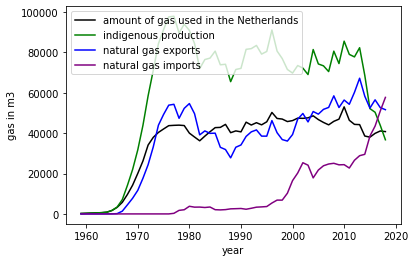

In [685]:
#plotting the development of gas used in the netherlands, gas that was produced inside the Netherlands, gas exports, and gas imports
sns.lineplot(x='year', y='gas_used_in_the_Netherlands', data=supply, color='black')
sns.lineplot(x='year', y='indigenous_production', data=supply, color='green')
sns.lineplot(x='year', y='natural_gas_exports', data=supply, color='blue')
sns.lineplot(x='year', y='natural_gas_imports', data=supply, color='purple')
plt.legend(labels=['amount of gas used in the Netherlands', 'indigenous production', 'natural gas exports', 'natural gas imports'])
plt.ylabel("gas in m3")
plt.xlabel("year")

In [686]:
#export the datafile to visualise in Florish
export_csv = supply.to_csv (r'C:\Users\nicol\Desktop\export_dataframe_gas.csv', index = None, header=True)

##### *Note on Visualisation*
Flourish is an online tool that allows one to design custom-designed data visualisations without in a fairly easy manner. In this case I used it to create a line chart similar to the one I already plotted above. Once again, I simply uploaded the csv file into Flourish, chose the proper chart type, specified the year column as the x values and the remaining columns as unique y values. I then added a title, a source, and x- and y-axis labels. In addition to that, I marked several important dates with annotations for the readers' reference.

### Step 3: Adding data on housing prices
#### Step 3.1: Examining overall development of housing prices in the region and comparing it to a reference area
In a first step, I am loading the data for housing prices into pandas. The data concerns the 10 most affected townships I had identified earlier. 

In [687]:
#load the housingmarket data for the top ten locations, the township with most earthquakes; source: https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=83625NED&_theme=366
housingmarket_tt = pd.read_csv('housingmarket_top10.csv', sep=';')
#change the datatype of the year data
housingmarket_tt['Perioden'] = housingmarket_tt['Perioden'].astype(str)
#remove unwanted parts of the year data
housingmarket_tt['Perioden'] = [x[:-4] for x in housingmarket_tt['Perioden']]
#rename columns
housingmarket_tt = housingmarket_tt.rename(columns ={'RegioS': 'region', 'Perioden': 'year','GemiddeldeVerkoopprijs_1': 'average_selling_price'})
#replace region codes by their actual name; source: https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83287NED/table?fromstatweb
housingmarket_tt = housingmarket_tt.replace({'GM0003':'Appingedam', 'GM0010':'Delfzijl', 'GM0014':'Groningen', 'GM0017':'Haren', 'GM0024':'Loppersum' , 'GM0040':'Slochteren' , 'GM0047':'Veendam' , 'GM0114':'Emmen' , 'GM1730':'Tynaarlo' , 'GM1987':'Menterwolde'})
#select only relevant columns
housingmarket_tt = housingmarket_tt[['region', 'year', 'average_selling_price']]
#add index column to index by year
housingmarket_tt['index'] = housingmarket_tt['year']
housingmarket_tt = housingmarket_tt.set_index('index')
#change the datatype of the year column
housingmarket_tt['year'] = housingmarket_tt['year'].astype(int)
#inspect the data
housingmarket_tt.head()

,region,year,average_selling_price
index,,,
1995,Appingedam,1995,63239.0
1996,Appingedam,1996,63839.0
1997,Appingedam,1997,75184.0
1998,Appingedam,1998,77023.0
1999,Appingedam,1999,80202.0


In [688]:
#make sure that all townships are indeed included in the dataset
housingmarket_tt['region'].value_counts()

Delfzijl       24
Haren          24
Menterwolde    24
Appingedam     24
Groningen      24
Loppersum      24
Tynaarlo       24
Slochteren     24
Veendam        24
Emmen          24
Name: region, dtype: int64

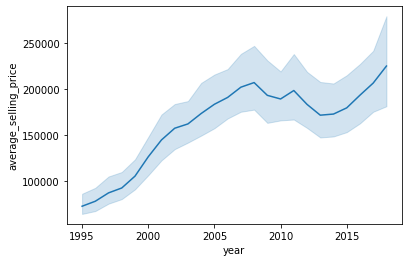

In [689]:
# plot the development of housing prices among the top ten affected townships in the Groningen gas field over time
sns.lineplot(x='year', y='average_selling_price', data=housingmarket_tt)

[Text(0.5, 1.0, 'Housingprices over the years')]

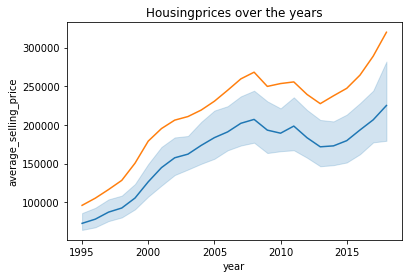

In [703]:
#load the housingmarket data for west nederland as a comparison
housingmarket_west = pd.read_csv('housingmarket_westnederland.csv', sep=';')
#change the datatype of the year data
housingmarket_west['Perioden'] = housingmarket_west['Perioden'].astype(str)
#remove unwanted parts of the year data
housingmarket_west['Perioden'] = [x[:-4] for x in housingmarket_west['Perioden']]
#rename columns
housingmarket_west = housingmarket_west.rename(columns ={'Perioden': 'year','GemiddeldeVerkoopprijs_1': 'average_selling_price'})
#add a column with the region name
housingmarket_west['region'] = 'West-Nederland'
#select only relevant columns
housingmarket_west = housingmarket_west[['region', 'year', 'average_selling_price']]
#add index column to index by year
housingmarket_west['index'] = housingmarket_west['year']
housingmarket_west = housingmarket_west.set_index('index')
#change the datatype of the year column
housingmarket_west['year'] = housingmarket_west['year'].astype(int)
# plot the development of housing prices over time and compare it to the development in Appingedam
sns.lineplot(x='year', y='average_selling_price', data=housingmarket_tt)
sns.lineplot(x='year', y='average_selling_price', data=housingmarket_west).set(title="Housingprices over the years")

In this visualisation it becomes apparent, that the development of housing prices among the ten most affected townships in Groningen province follows pretty much the same pattern as the development in West Nederland. In the following I'll break down the housingmarket_tt data by township to check for potential differences across regions (after all the townships were not affected eqally, so there might be fluctuations) and merge this dataset with the data fr West Nederland as a reference point.
   
#### Step 3.2: Breaking down the development of housing prices in the region by township and relating it to a reference area
To do so I need to create a second dataset where the housing price per year is organised by townships.

In [704]:
#adding the data on West Nederland to a new dataframe
housingmarket_agg = housingmarket_tt.append(housingmarket_west)
#create a second dataset where the housing price per year is organised by townships
housingmarket_agg = housingmarket_agg.groupby(['region', 'year'])['average_selling_price'].aggregate('sum').unstack()
housingmarket_agg

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
region,,,,,,,,,,,,,,,,,,,,,
Appingedam,63239.0,63839.0,75184.0,77023.0,80202.0,93688.0,112452.0,126843.0,141034.0,153787.0,...,159694.0,167311.0,171155.0,151738.0,141286.0,146861.0,146925.0,164504.0,174924.0,192439.0
Delfzijl,61842.0,62973.0,73437.0,69550.0,78474.0,92073.0,96377.0,113476.0,112657.0,126393.0,...,138547.0,141921.0,143982.0,137535.0,132658.0,123452.0,130887.0,132086.0,140643.0,142173.0
Emmen,74636.0,83434.0,93054.0,100686.0,108330.0,122583.0,133447.0,148534.0,154476.0,157012.0,...,171201.0,173616.0,170985.0,163328.0,154309.0,154291.0,163937.0,171741.0,184750.0,196312.0
Groningen,62635.0,69727.0,74094.0,77433.0,84859.0,99943.0,116391.0,127692.0,139806.0,146570.0,...,184709.0,180217.0,182373.0,173646.0,165860.0,170483.0,177441.0,186685.0,206996.0,226280.0
Haren,120413.0,127622.0,144939.0,151621.0,167272.0,209076.0,244611.0,240368.0,244514.0,291016.0,...,329720.0,296918.0,346393.0,311820.0,301664.0,287535.0,302170.0,314351.0,332386.0,371530.0
Loppersum,65708.0,65679.0,74255.0,86487.0,93141.0,114180.0,128646.0,152742.0,152407.0,160441.0,...,176819.0,169303.0,183440.0,171097.0,149523.0,152793.0,146694.0,194173.0,175980.0,187507.0
Menterwolde,67499.0,73735.0,80937.0,90496.0,100224.0,124685.0,139195.0,157011.0,166474.0,160129.0,...,155566.0,176479.0,164818.0,156691.0,146511.0,141824.0,150535.0,174720.0,183958.0,0.0
Slochteren,76576.0,88800.0,96946.0,96869.0,118990.0,140196.0,163383.0,170266.0,170629.0,174788.0,...,218601.0,187206.0,213565.0,191872.0,168967.0,176786.0,193719.0,201318.0,234489.0,0.0
Tynaarlo,0.0,0.0,0.0,0.0,128198.0,167913.0,193475.0,208101.0,202837.0,223887.0,...,244327.0,247609.0,254612.0,231622.0,219146.0,232828.0,240252.0,262004.0,273808.0,311688.0


In [705]:
#transpose data to get a format Flourish can interpret
housingmarket_agg2 = housingmarket_agg.transpose()
#add a year column because Flourish doesn't recognise index values
housingmarket_agg2['year'] = range(1995, 2019)
#add the housing price average among the top 10 affected townships; to do so I first replace zeros by missing values so missing data doesn't skew the calculated means
housingmarket_agg2 = housingmarket_agg2.replace(0, np.NaN)
housingmarket_agg2['top10-average'] = housingmarket_agg2[['Appingedam', 'Delfzijl', 'Emmen', 'Groningen', 'Haren', 'Loppersum', 'Menterwolde', 'Slochteren', 'Tynaarlo', 'Veendam']].mean(axis=1)
#inspect data
housingmarket_agg2

region,Appingedam,Delfzijl,Emmen,Groningen,Haren,Loppersum,Menterwolde,Slochteren,Tynaarlo,Veendam,West-Nederland,year,top10-average
year,,,,,,,,,,,,,
1995,63239.0,61842.0,74636.0,62635.0,120413.0,65708.0,67499.0,76576.0,NaN,62633.0,96079.0,1995,72797.888889
1996,63839.0,62973.0,83434.0,69727.0,127622.0,65679.0,73735.0,88800.0,NaN,68196.0,105359.0,1996,78222.777778
1997,75184.0,73437.0,93054.0,74094.0,144939.0,74255.0,80937.0,96946.0,NaN,72862.0,116500.0,1997,87300.888889
1998,77023.0,69550.0,100686.0,77433.0,151621.0,86487.0,90496.0,96869.0,NaN,83569.0,128373.0,1998,92637.111111
1999,80202.0,78474.0,108330.0,84859.0,167272.0,93141.0,100224.0,118990.0,128198.0,95479.0,150549.0,1999,105516.900000
2000,93688.0,92073.0,122583.0,99943.0,209076.0,114180.0,124685.0,140196.0,167913.0,100755.0,179105.0,2000,126509.200000
2001,112452.0,96377.0,133447.0,116391.0,244611.0,128646.0,139195.0,163383.0,193475.0,120481.0,195339.0,2001,144845.800000
2002,126843.0,113476.0,148534.0,127692.0,240368.0,152742.0,157011.0,170266.0,208101.0,130553.0,206232.0,2002,157558.600000
2003,141034.0,112657.0,154476.0,139806.0,244514.0,152407.0,166474.0,170629.0,202837.0,137740.0,210867.0,2003,162257.400000


In [706]:
#export the data as a csv that I ca then upload to Flourish
export_csv = housingmarket_agg2.to_csv (r'C:\Users\nicol\Desktop\export_dataframe_housingmarket_agg.csv', index = None, header=True)

##### *Note on Visualisation*
Flourish is an online tool that allows one to design custom-designed data visualisations in a fairly easy manner. In this case I used it to create a grid of line charts that depicts the development of housing prices per township. I manually added a name for the y-axis, a title, and a the data source to the chart. I also made sure that the colour palette matches my earlier pie chart about how many earthquakes a township saw, so it is easy for the reader to compare the two.